<a href="https://colab.research.google.com/github/2303A51171/T.ROHITH/blob/main/LAB-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Part 1 – Import the required Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Load the classified dataset into a dataframe using pandas
# Replace 'classified_manufacturing_dataset.csv' with the actual path to your dataset
df = pd.read_csv('//content/Classified_Data (1).txt')

# 2. Check the data types of each feature(column) in the dataset
data_types = df.dtypes
print("Data Types of each feature:\n", data_types)

# 3. Generate a summary of the dataset for min, max, stddev, quartile values
summary = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary of the dataset:\n", summary)

# 4. List the names of columns/features in the dataset
columns = df.columns.tolist()
print("\nColumns/Features in the dataset:\n", columns)

# 5. Scale the features using StandardScaler and transform the data
# Assuming that the target variable is the last column, adjust accordingly if needed
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally, convert back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Features:\n", X_scaled_df.head())


Data Types of each feature:
 Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

Summary of the dataset:
         Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
90%     899.100000     1.336612     1.441901     1.

PART-2


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN model has been fitted to the training data.")

Training set size: 800
Testing set size: 200
KNN model has been fitted to the training data.


part-3

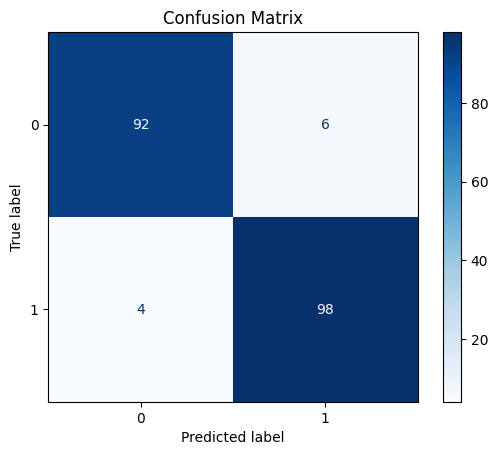

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
